## Installing Requirements

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn pyarrow joblib xgboost

## Importing Modules

In [2]:
import os
import pyarrow.feather as feather
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
import pickle
import joblib

## Loading dataset and cleaning data

In [3]:
final_combined_data_path = os.path.join(os.getcwd(), "final_combined_data.feather")
dataset = feather.read_feather(final_combined_data_path)

In [4]:
dataset = dataset[~dataset.duplicated(subset=['Sample_id'], keep=False)]
duplicates_sample_id = dataset[dataset.duplicated(subset=['Sample_id'], keep=False)]
duplicates = dataset[dataset.duplicated(keep=False)]

print(f"Total duplicate Sample_id entries: {duplicates_sample_id.shape[0]}")
print(f"Total duplicate entries: {duplicates.shape[0]}")

Total duplicate Sample_id entries: 0
Total duplicate entries: 0


In [5]:
dataset = dataset.dropna(subset=['Response_standard'])

In [6]:
dataset = dataset.dropna(thresh=(len(dataset) - 8000), axis=1)

## Encoding Features 
* Response
* Drug list

In [7]:
le_response = LabelEncoder()
dataset['Response_standard'] = le_response.fit_transform(dataset['Response_standard'])

le_drug = LabelEncoder()
dataset['Drug_list'] = le_drug.fit_transform(dataset['Drug_list'].astype(str))

In [8]:
gene_cols = dataset.columns[dataset.columns.get_loc("Sampling location category") + 1:]
X = dataset[gene_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
X['Drug_list'] = dataset['Drug_list']
y = dataset['Response_standard']

## Viewing processed dataset 

In [9]:
dataset.shape

(10523, 31702)

In [10]:
dataset.head()

,Resource,Reference,Source,Sample_id,Data_type,Platform,Cancer_type_level1,Cancer_type_level2,Cancer_type_level3,Cancer_type_level4,...,ZNF705E,ZNF736P10Y,ZNF736P6Y,ZNF839P1,ZNF849P,ZNF92P1Y,ZNF962P,ZNF969P,ZSCAN5C,ZSWIM5P1
0,GEO,24443618,GSE50948,GSM1233067,Microarray,GPL570 [HG-U133_Plus_2] Affymetrix Human Genom...,Breast cancer,Her2-receptor negative breast cancer,nan,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GEO,24443618,GSE50948,GSM1233069,Microarray,GPL570 [HG-U133_Plus_2] Affymetrix Human Genom...,Breast cancer,Her2-receptor negative breast cancer,nan,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GEO,24443618,GSE50948,GSM1233072,Microarray,GPL570 [HG-U133_Plus_2] Affymetrix Human Genom...,Breast cancer,Her2-receptor negative breast cancer,nan,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GEO,24443618,GSE50948,GSM1233085,Microarray,GPL570 [HG-U133_Plus_2] Affymetrix Human Genom...,Breast cancer,Her2-receptor negative breast cancer,nan,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GEO,24443618,GSE50948,GSM1233086,Microarray,GPL570 [HG-U133_Plus_2] Affymetrix Human Genom...,Breast cancer,Her2-receptor negative breast cancer,nan,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Spliting training and testing data
#### (70% training & 30% testing)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest

In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    oob_score=False,
    random_state=7
)
model.fit(X_train_scaled, y_train)

In [12]:
rf = joblib.load("random_forest.pkl")

y_train_pred = rf.predict(X_train_scaled)
print("\n--- On Training Data ---")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Precision:", precision_score(y_train, y_train_pred, average='weighted', zero_division=0))
print("Train Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("Train F1 Score:", f1_score(y_train, y_train_pred, average='weighted'))

y_test_pred = rf.predict(X_test_scaled)
print("\n--- On Test Data ---")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred, average='weighted', zero_division=0))
print("Test Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("Test F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))

rf_train_scores = [
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred, average='weighted', zero_division=0),
    recall_score(y_train, y_train_pred, average='weighted'),
    f1_score(y_train, y_train_pred, average='weighted')
]

rf_test_scores = [
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred, average='weighted', zero_division=0),
    recall_score(y_test, y_test_pred, average='weighted'),
    f1_score(y_test, y_test_pred, average='weighted')
]


--- On Training Data ---
Train Accuracy: 0.6558512082541407
Train Precision: 0.5487005730161103
Train Recall: 0.6558512082541407
Train F1 Score: 0.5642540039558874

--- On Test Data ---
Test Accuracy: 0.6484003801076972
Test Precision: 0.5305605644737975
Test Recall: 0.6484003801076972
Test F1 Score: 0.5551714695621887


## XGBoost

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBClassifier(
    n_estimators=15,
    max_depth=2,
    learning_rate=0.2,
    subsample=0.4,
    colsample_bytree=0.4,
    reg_lambda=2.0,
    reg_alpha=1.0,
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=0,
    tree_method='hist',
    n_jobs=-1
)

xgb_model.fit(X_train_scaled, y_train)

In [15]:
with open("xgboost.pkl", 'rb') as f:
    xgb = pickle.load(f)

y_train_pred = xgb.predict(X_train_scaled)
print("\n--- On Training Data ---")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Precision:", precision_score(y_train, y_train_pred, average='weighted', zero_division=0))
print("Train Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("Train F1 Score:", f1_score(y_train, y_train_pred, average='weighted'))

y_test_pred = xgb.predict(X_test_scaled)
print("\n--- On Test Data ---")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred, average='weighted', zero_division=0))
print("Test Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("Test F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))

xgb_train_scores = [
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred, average='weighted', zero_division=0),
    recall_score(y_train, y_train_pred, average='weighted'),
    f1_score(y_train, y_train_pred, average='weighted')
]

xgb_test_scores = [
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred, average='weighted', zero_division=0),
    recall_score(y_test, y_test_pred, average='weighted'),
    f1_score(y_test, y_test_pred, average='weighted')
]



--- On Training Data ---
Train Accuracy: 0.9467825142546836
Train Precision: 0.9325419202178156
Train Recall: 0.9467825142546836
Train F1 Score: 0.9356135158960697

--- On Test Data ---
Test Accuracy: 0.9094076655052264
Test Precision: 0.8938849677103252
Test Recall: 0.9094076655052264
Test F1 Score: 0.892594741488645


## KNN

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=30, n_jobs=-1) 

knn_model.fit(X_train_scaled, y_train)

In [13]:
with open("knn.pkl", 'rb') as f:
    knn = pickle.load(f)

y_train_pred = knn.predict(X_train_scaled)
print("\n--- On Training Data ---")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Precision:", precision_score(y_train, y_train_pred, average='weighted', zero_division=0))
print("Train Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("Train F1 Score:", f1_score(y_train, y_train_pred, average='weighted'))

y_test_pred = knn.predict(X_test_scaled)
print("\n--- On Test Data ---")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred, average='weighted', zero_division=0))
print("Test Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("Test F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))

knn_train_scores = [
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred, average='weighted', zero_division=0),
    recall_score(y_train, y_train_pred, average='weighted'),
    f1_score(y_train, y_train_pred, average='weighted')
]

knn_test_scores = [
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred, average='weighted', zero_division=0),
    recall_score(y_test, y_test_pred, average='weighted'),
    f1_score(y_test, y_test_pred, average='weighted')
]



--- On Training Data ---
Train Accuracy: 0.8669562856367092
Train Precision: 0.8493819702420101
Train Recall: 0.8669562856367092
Train F1 Score: 0.8414577459442569

--- On Test Data ---
Test Accuracy: 0.8612606905289832
Test Precision: 0.8449917035021829
Test Recall: 0.8612606905289832
Test F1 Score: 0.8344307094890828


## Visualizing Metrics

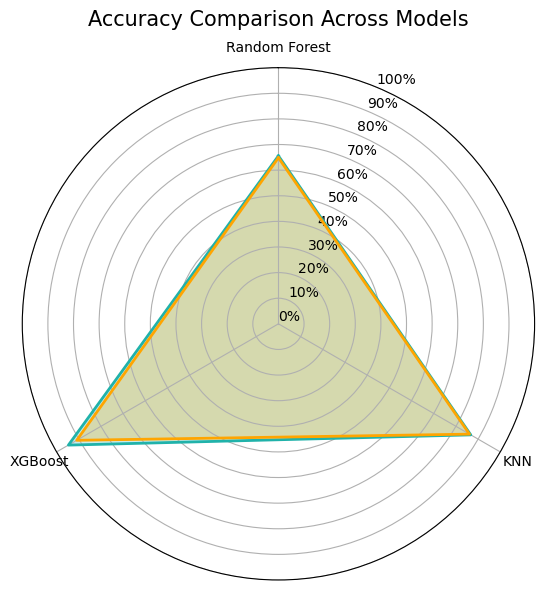

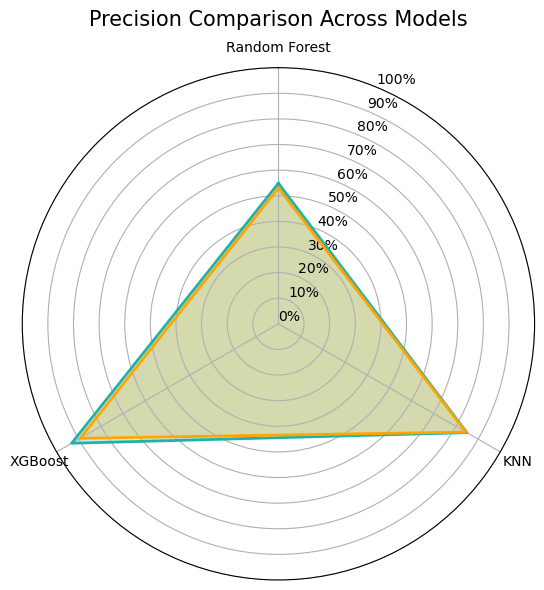

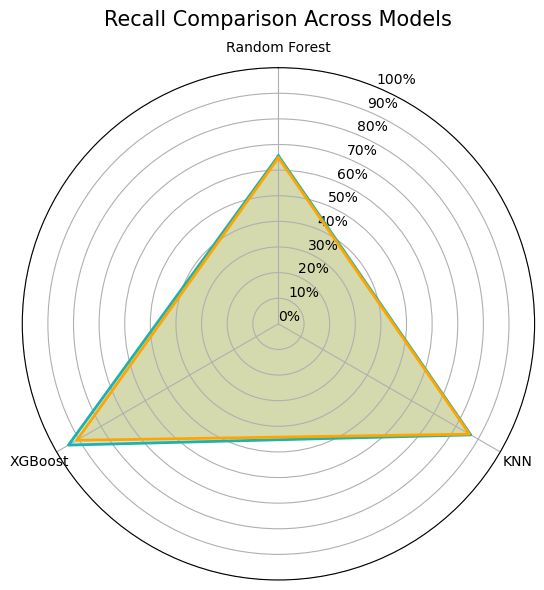

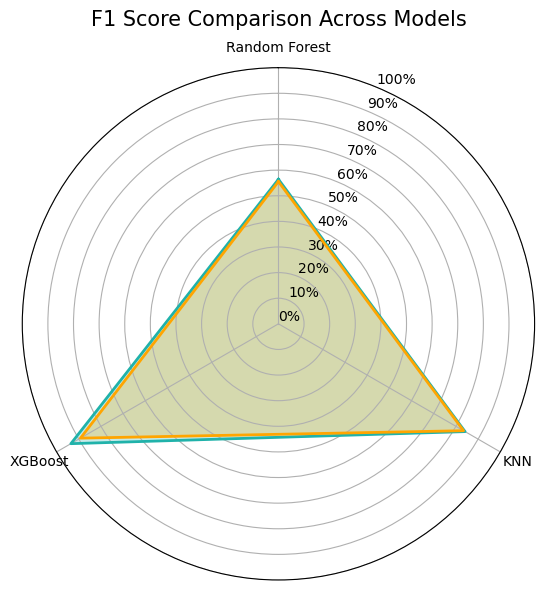

In [16]:
models = ['Random Forest', 'KNN', 'XGBoost']

train_scores = {
    'Random Forest': rf_train_scores,
    'KNN': knn_train_scores,
    'XGBoost': xgb_train_scores,
}

test_scores = {
    'Random Forest': rf_test_scores,
    'KNN': knn_test_scores,
    'XGBoost': xgb_test_scores,
}

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for idx, metric in enumerate(metrics):
    labels = models
    num_labels = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False).tolist()
    angles += angles[:1]  # to complete the circle

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    train_metric_scores = [train_scores[model][idx] for model in models]
    test_metric_scores = [test_scores[model][idx] for model in models]

    train_metric_scores += train_metric_scores[:1]
    test_metric_scores += test_metric_scores[:1]

    ax.plot(angles, train_metric_scores, color='lightseagreen', linewidth=2, label='Train')
    ax.fill(angles, train_metric_scores, color='lightseagreen', alpha=0.25)

    ax.plot(angles, test_metric_scores, color='orange', linewidth=2, label='Test')
    ax.fill(angles, test_metric_scores, color='orange', alpha=0.25)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)

    ax.set_ylim(0, 1) 
    ax.set_yticks(np.arange(0, 1.1, 0.1)) 

    ax.set_yticklabels([f'{int(x * 100)}%' for x in ax.get_yticks()])

    ax.set_title(f'{metric} Comparison Across Models', size=15, loc='center', pad=30)

    plt.subplots_adjust(bottom=0.2)  
    plt.tight_layout()
    plt.show()


## Generating Heatmaps

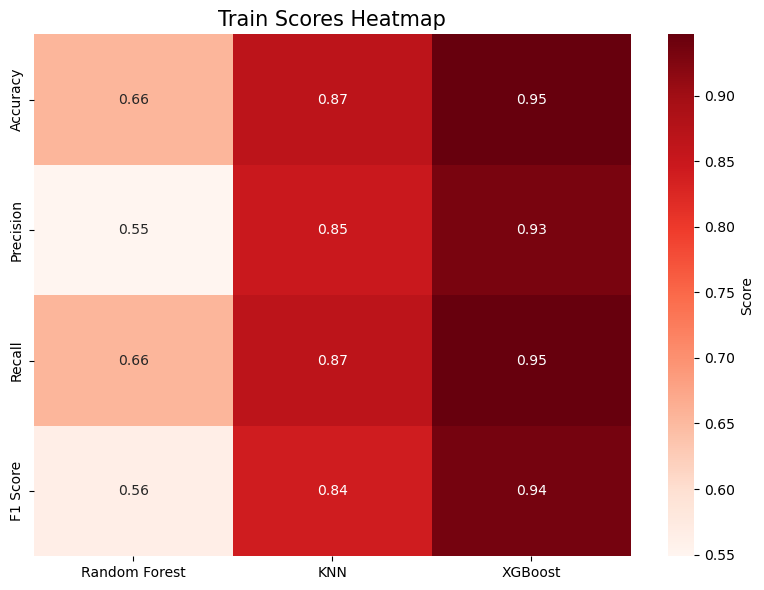

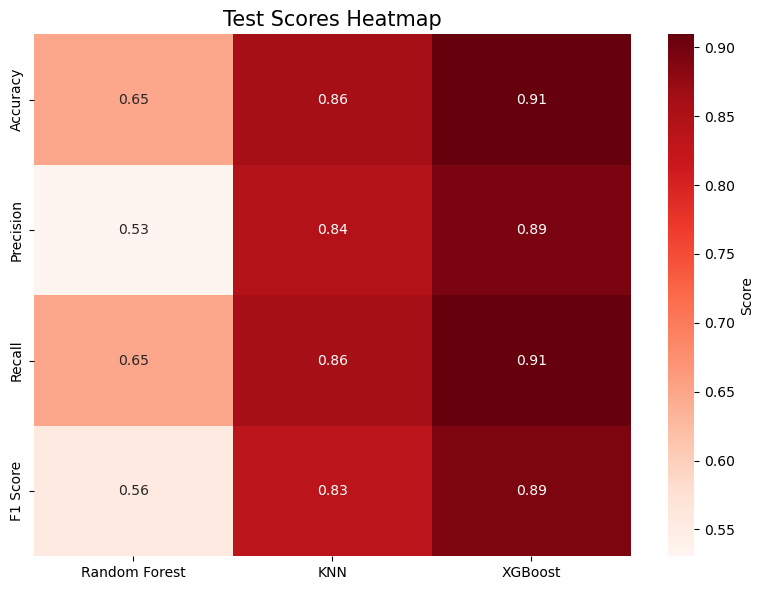

In [17]:
models = ['Random Forest', 'KNN', 'XGBoost']

train_scores = {
    'Random Forest': rf_train_scores,
    'KNN': knn_train_scores,
    'XGBoost': xgb_train_scores,
}

test_scores = {
    'Random Forest': rf_test_scores,
    'KNN': knn_test_scores,
    'XGBoost': xgb_test_scores,
}

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

heatmap_data = np.array([
    [train_scores[model][i] for model in models] for i in range(len(metrics))
])

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Reds", xticklabels=models, yticklabels=metrics, cbar_kws={'label': 'Score'})
plt.title('Train Scores Heatmap', size=15)
plt.tight_layout()
plt.show()

heatmap_data_test = np.array([
    [test_scores[model][i] for model in models] for i in range(len(metrics))
])

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_test, annot=True, fmt=".2f", cmap="Reds", xticklabels=models, yticklabels=metrics, cbar_kws={'label': 'Score'})
plt.title('Test Scores Heatmap', size=15)
plt.tight_layout()
plt.show()
